<a href="https://colab.research.google.com/github/hamiin47/Assignment/blob/main/ESAA_YB_Week3_0921_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None # default='warn'

Let us list out the files that are present in this competition.!

In [48]:
order_products_train_df = pd.read_csv("/content/sample_data/order_products__train.csv")
order_products_prior_df = pd.read_csv("/content/drive/MyDrive/order_products__prior.csv")
orders_df = pd.read_csv("/content/drive/MyDrive/orders.csv")
products_df = pd.read_csv("/content/drive/MyDrive/products.csv")
aisles_df = pd.read_csv("/content/drive/MyDrive/aisles.csv")
departments_df = pd.read_csv("/content/drive/MyDrive/departments.csv")

In [49]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [50]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0


In [51]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


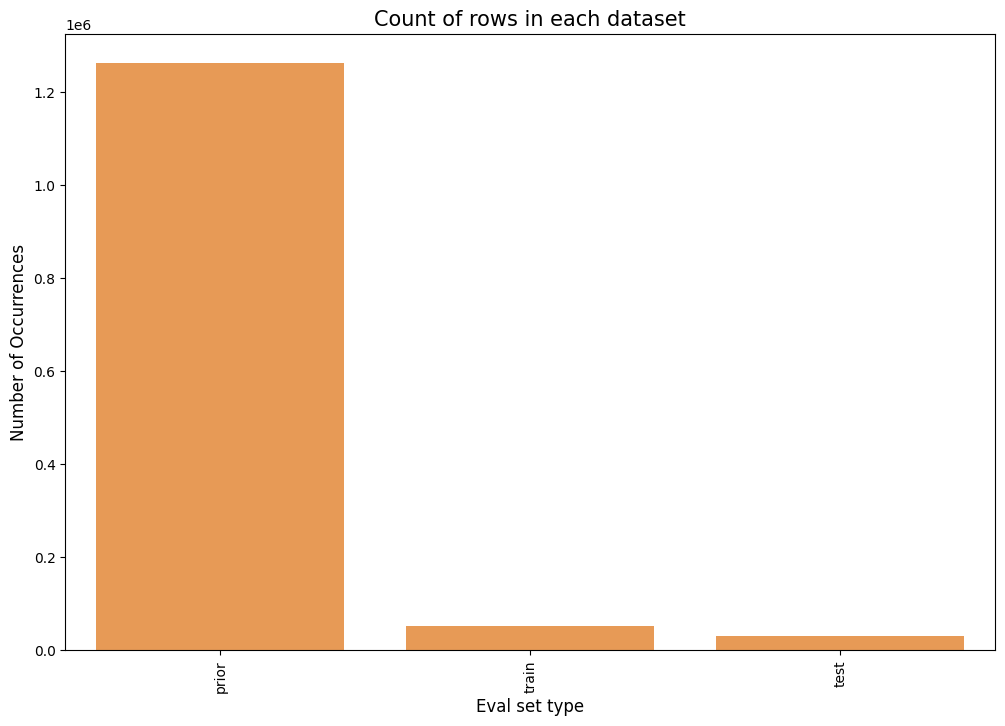

In [52]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,80622
test,29441
train,51180


<ipython-input-54-0c6ccfb257e6>:1: FutureWarning: The provided callable <function max at 0x7dd3128cf9a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()


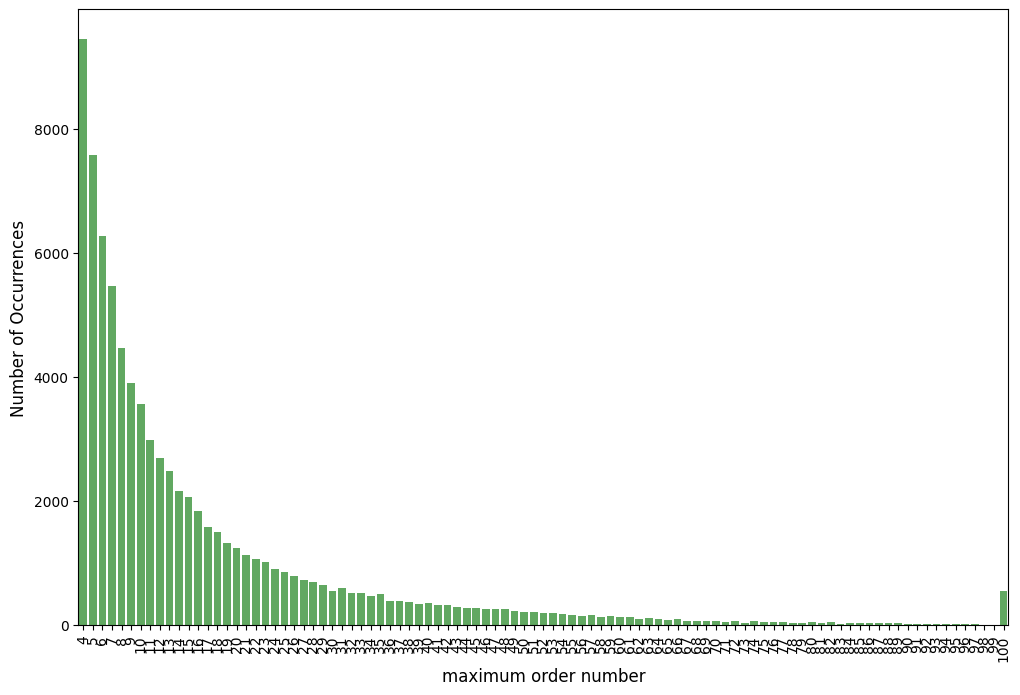

In [54]:
cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha = 0.8, color = color[2])
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('maximum order number', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

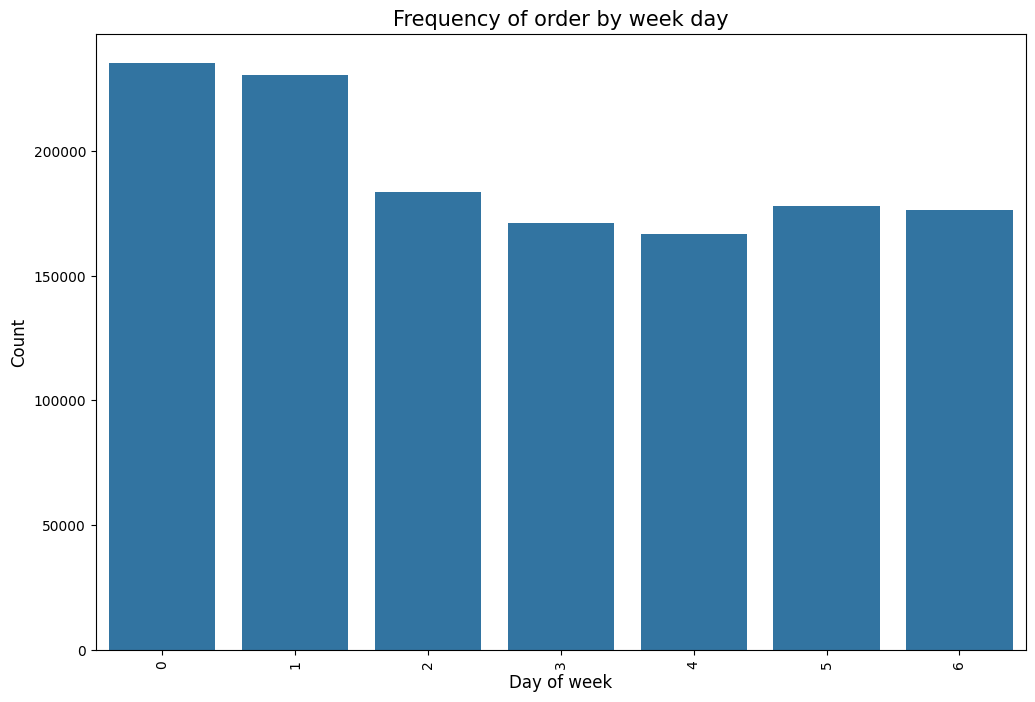

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0])
plt.ylabel('Count', fontsize = 12)
plt.xlabel("Day of week", fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.title("Frequency of order by week day", fontsize = 15)
plt.show()

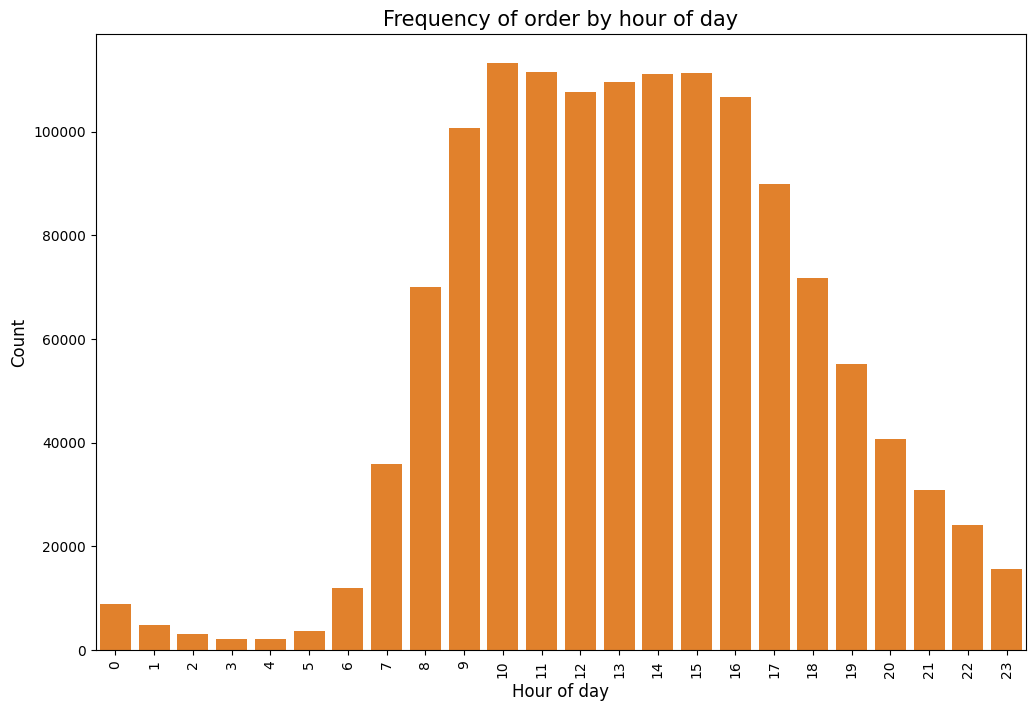

In [56]:
plt.figure(figsize = (12,8))
sns.countplot(x = "order_hour_of_day", data = orders_df, color = color[1])
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Hour of day', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.title("Frequency of order by hour of day", fontsize = 15)
plt.show()

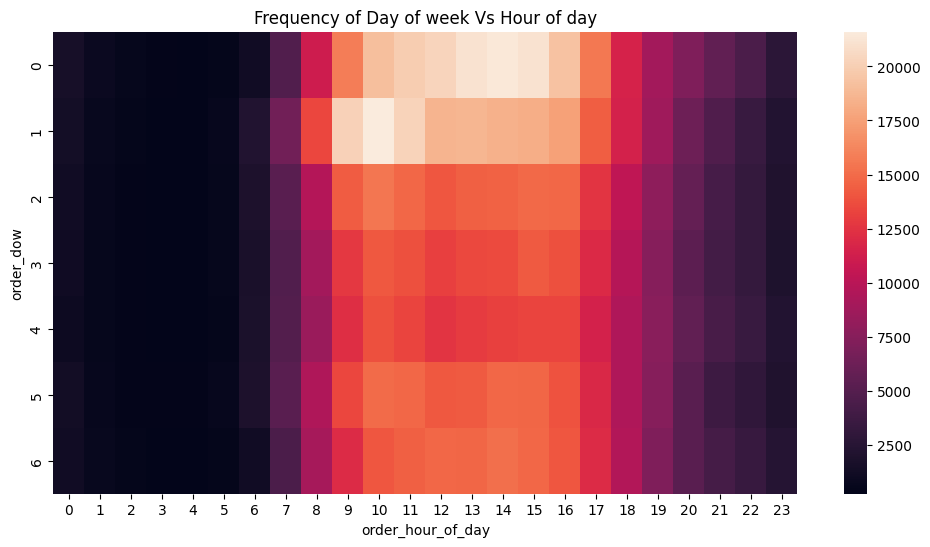

In [57]:
grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate('count').reset_index()
grouped_df = grouped_df.pivot(index = 'order_dow', columns = 'order_hour_of_day', values = 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

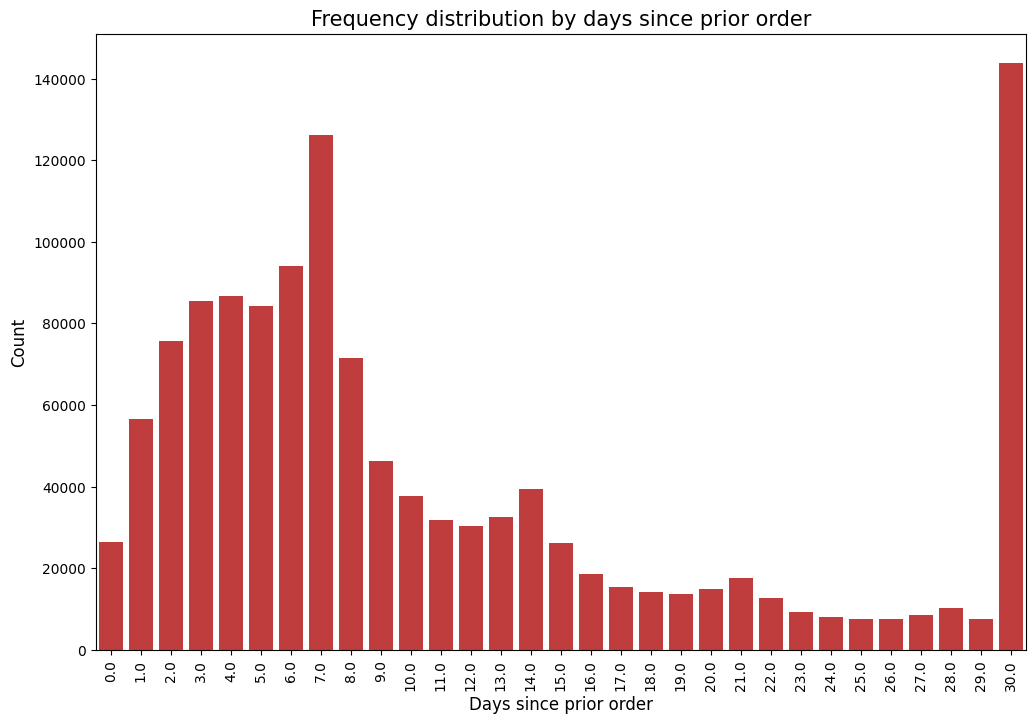

In [58]:
plt.figure(figsize = (12,8))
sns.countplot(x = "days_since_prior_order", data = orders_df, color = color[3])
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Days since prior order', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.title("Frequency distribution by days since prior order", fontsize = 15)
plt.show()

In [59]:
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5899808780730064

In [60]:
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

In [61]:
grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df.loc[grouped_df["reordered"] > 1, "reordered"] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1.0,0.879812
0.0,0.120188


In [62]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df.loc[grouped_df["reordered"]>1, "reordered"] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1,0.93444
0,0.06556


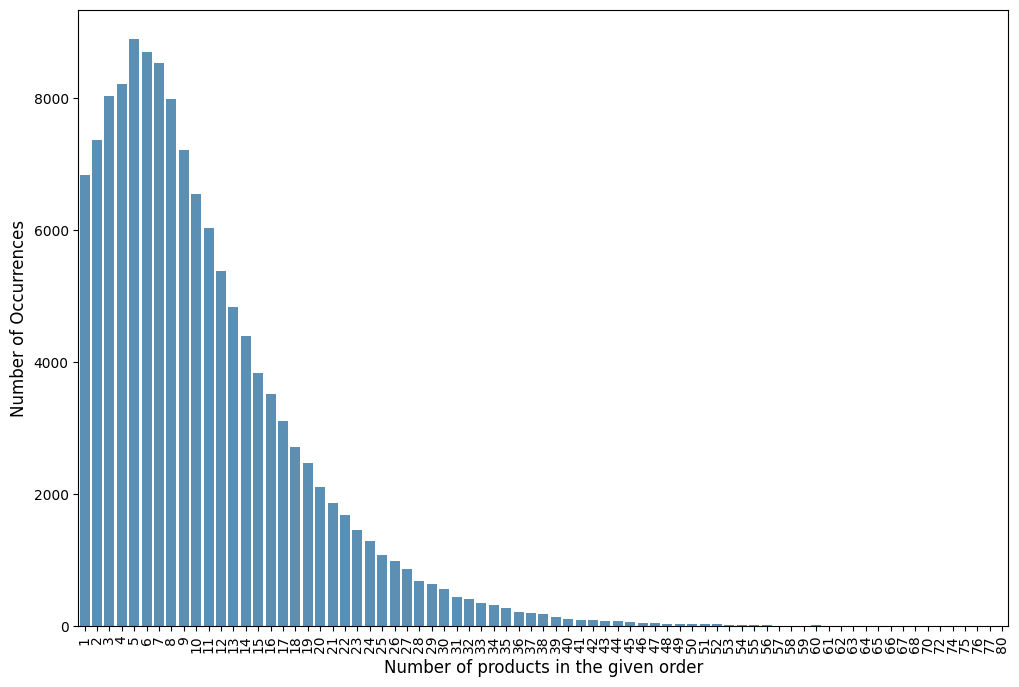

In [63]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize = (12,8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha=0.8)
plt.ylabel("Number of Occurrences", fontsize = 12)
plt.xlabel("Number of products in the given order", fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

In [64]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [65]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [66]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [67]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3.0,0.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4.0,1.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5.0,0.0,Natural Sweetener,17,13,baking ingredients,pantry


In [68]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,35986
1,Bag of Organic Bananas,28556
2,Organic Strawberries,19871
3,Organic Baby Spinach,18234
4,Organic Hass Avocado,16029
5,Organic Avocado,13245
6,Large Lemon,11579
7,Strawberries,10850
8,Limes,10617
9,Organic Whole Milk,10333


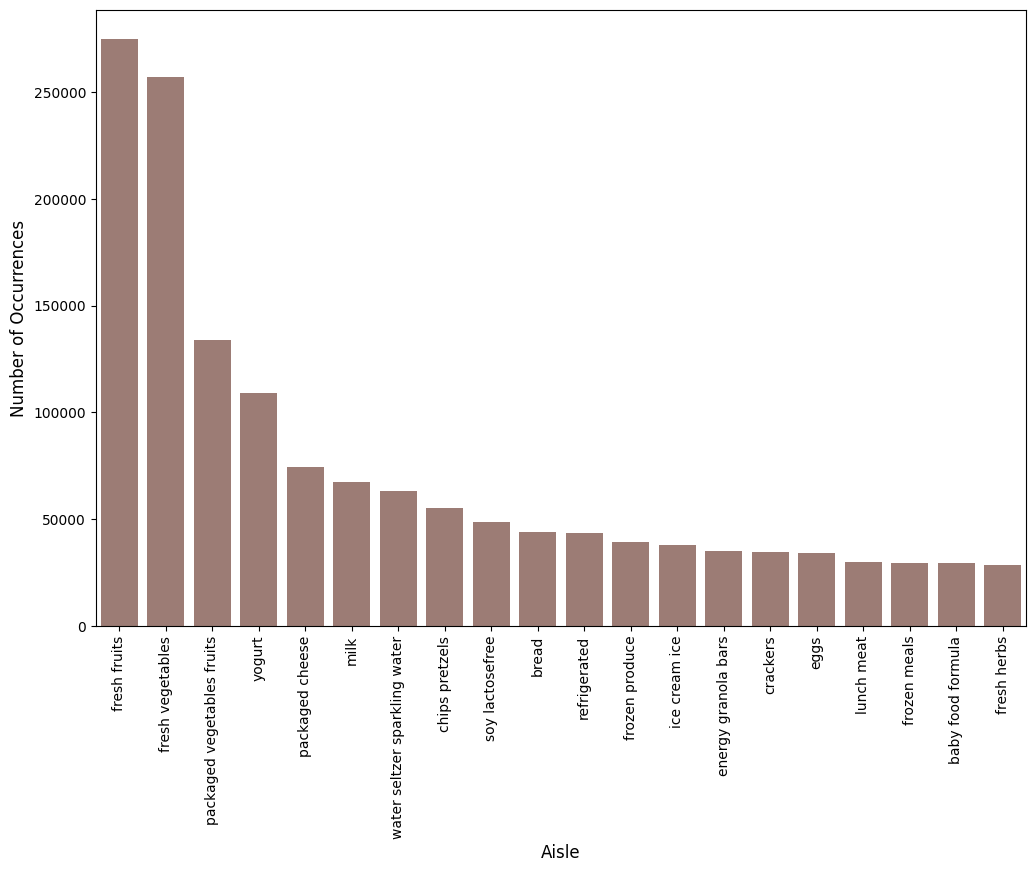

In [69]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha = 0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize = 12)
plt.xlabel('Aisle', fontsize = 12)
plt.xticks(rotation = 'vertical')
plt.show()

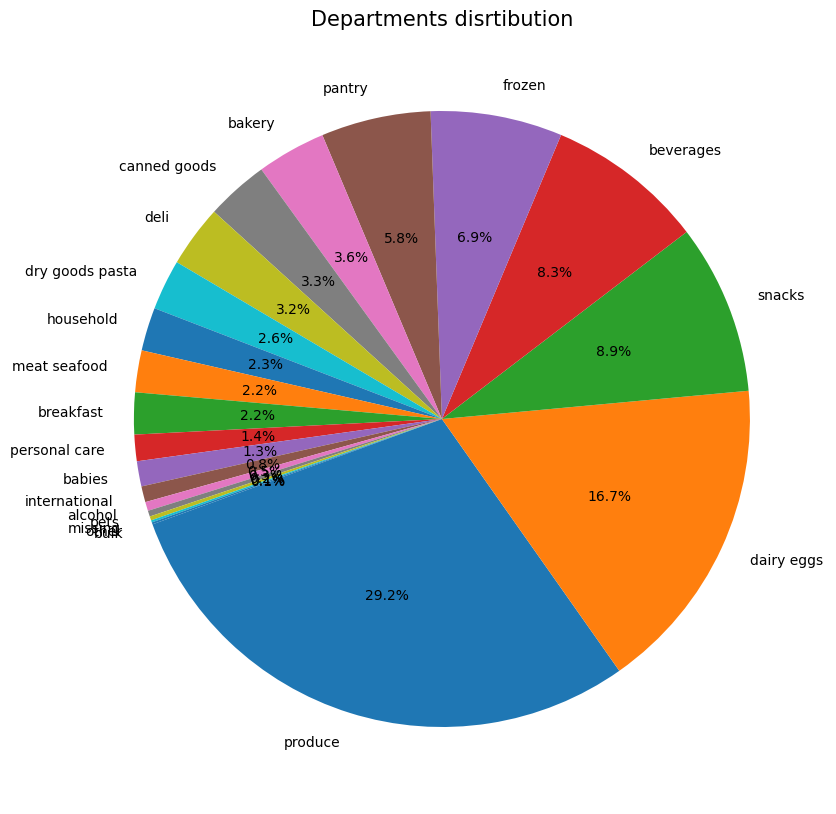

In [70]:
plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels = labels, autopct='%1.1f%%', startangle=200)
plt.title('Departments disrtibution', fontsize = 15)
plt.show()

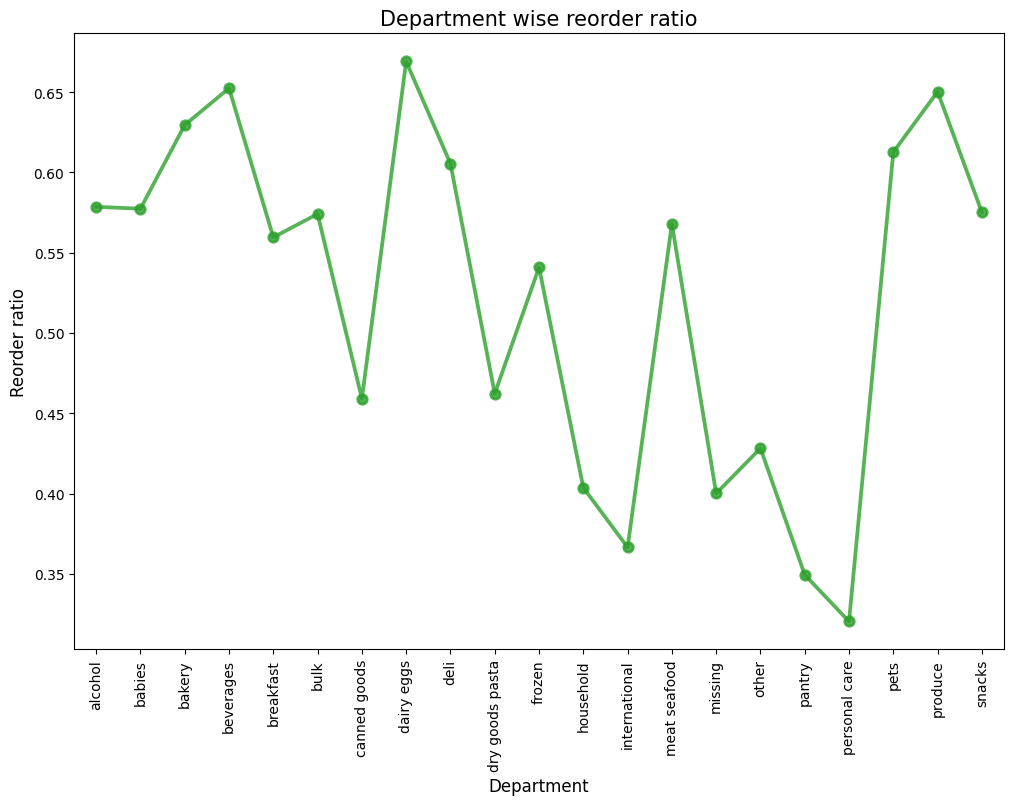

In [71]:
grouped_df = order_products_prior_df.groupby(['department'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x = grouped_df['department'].values, y = grouped_df['reordered'].values, alpha = 0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize = 12)
plt.xlabel('Department', fontsize = 12)
plt.title("Department wise reorder ratio", fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

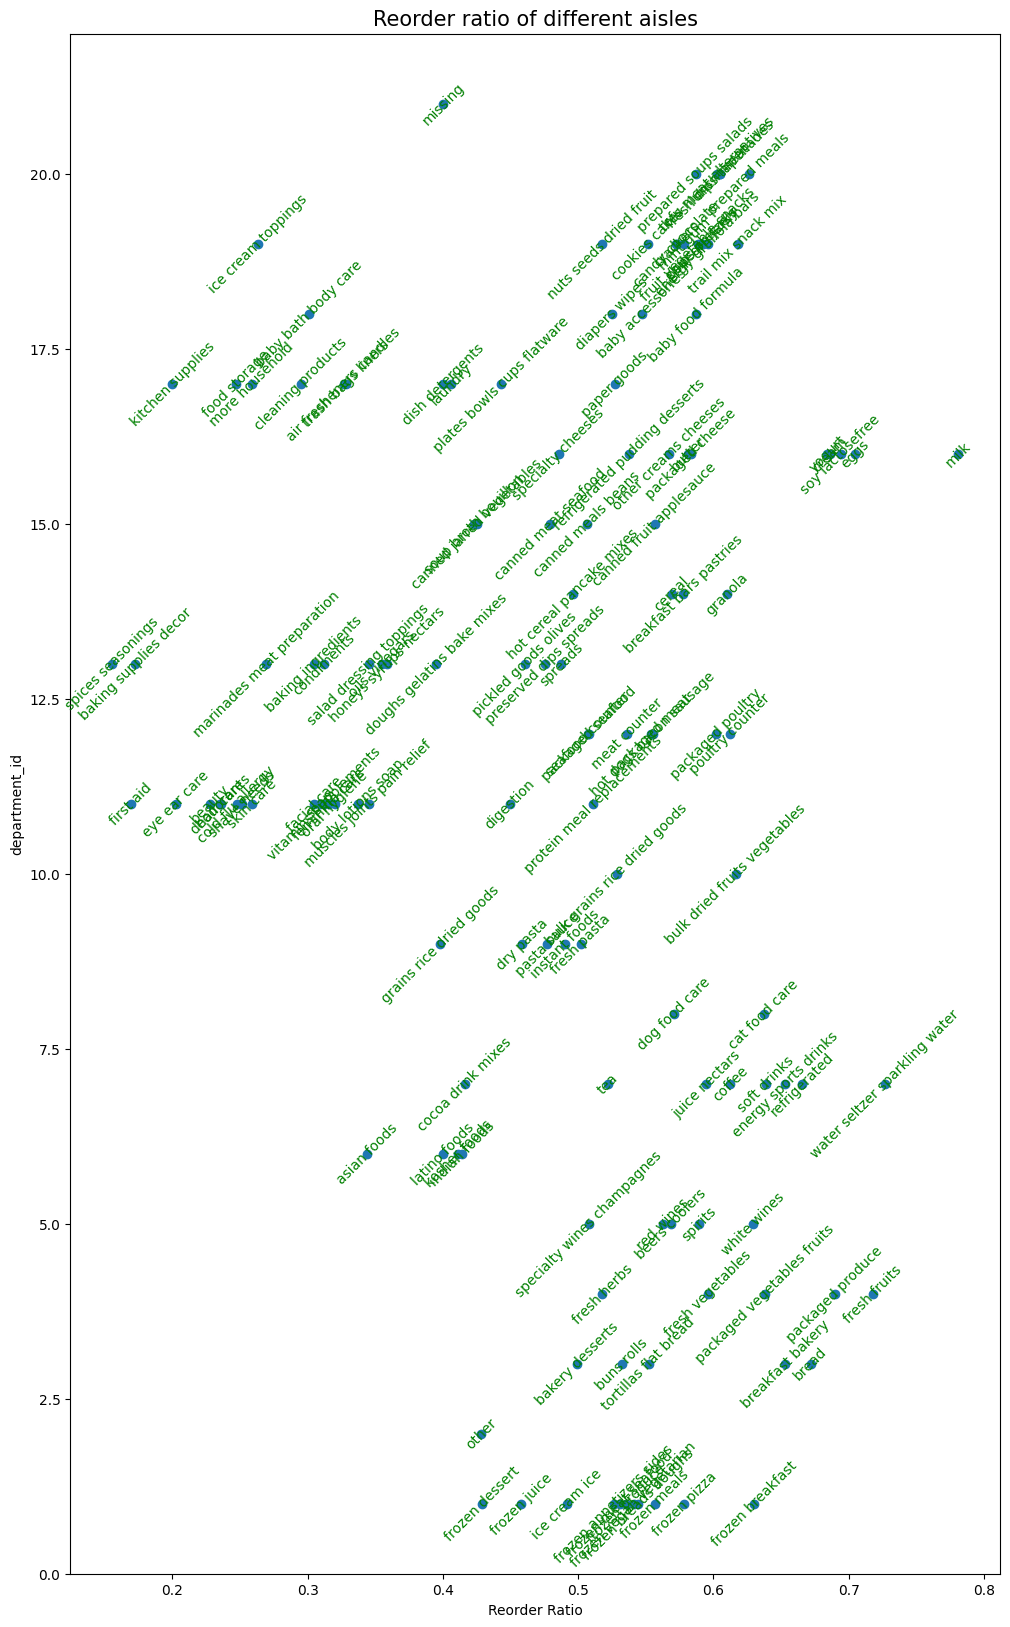

In [72]:
grouped_df = order_products_prior_df.groupby(['department_id','aisle'])['reordered'].aggregate('mean').reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation = 45, ha = 'center', va = 'center', color = 'green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title('Reorder ratio of different aisles', fontsize = 15)
plt.show()

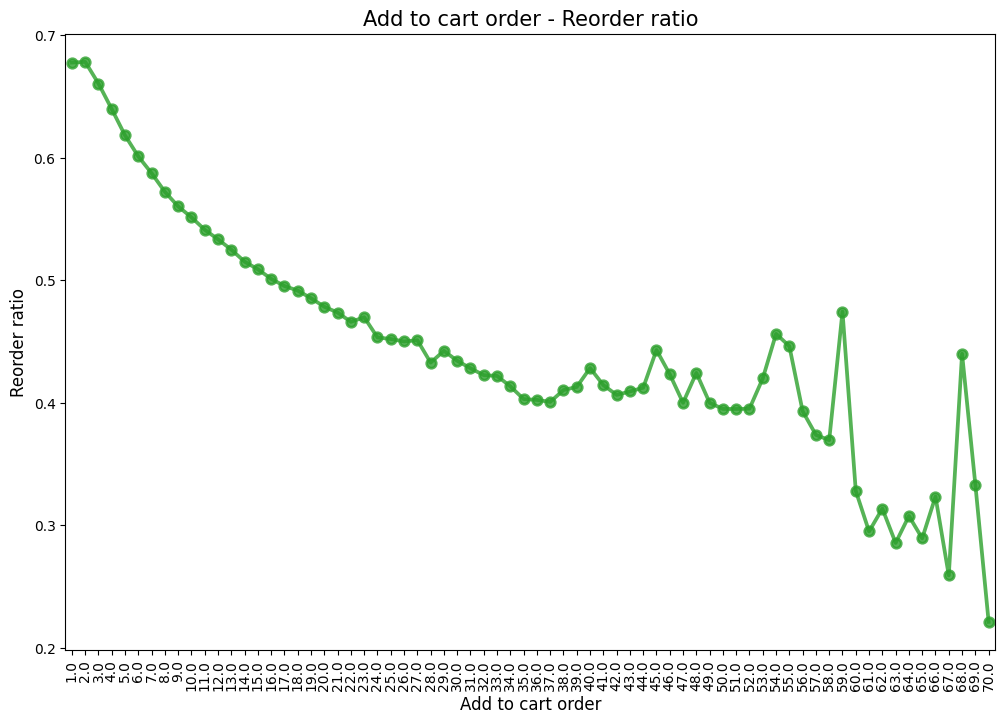

In [73]:
order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df['add_to_cart_order'].copy()
order_products_prior_df.loc[order_products_prior_df["add_to_cart_order_mod"]>70, "add_to_cart_order_mod"] = 70
grouped_df = order_products_prior_df.groupby(['add_to_cart_order_mod'])['reordered'].aggregate('mean').reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x = grouped_df['add_to_cart_order_mod'].values, y = grouped_df['reordered'].values, alpha = 0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize = 12)
plt.xlabel('Add to cart order', fontsize = 12)
plt.title('Add to cart order - Reorder ratio', fontsize = 15)
plt.xticks(rotation = 'vertical')
plt.show()

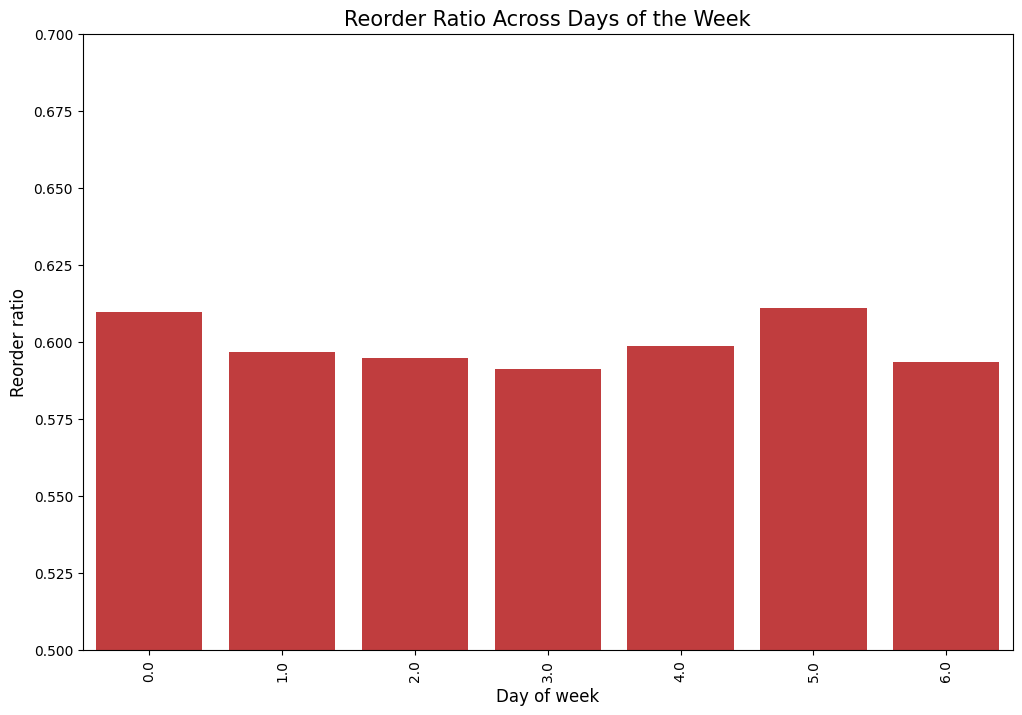

In [74]:
order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='order_dow', y='reordered', data=grouped_df, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder Ratio Across Days of the Week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

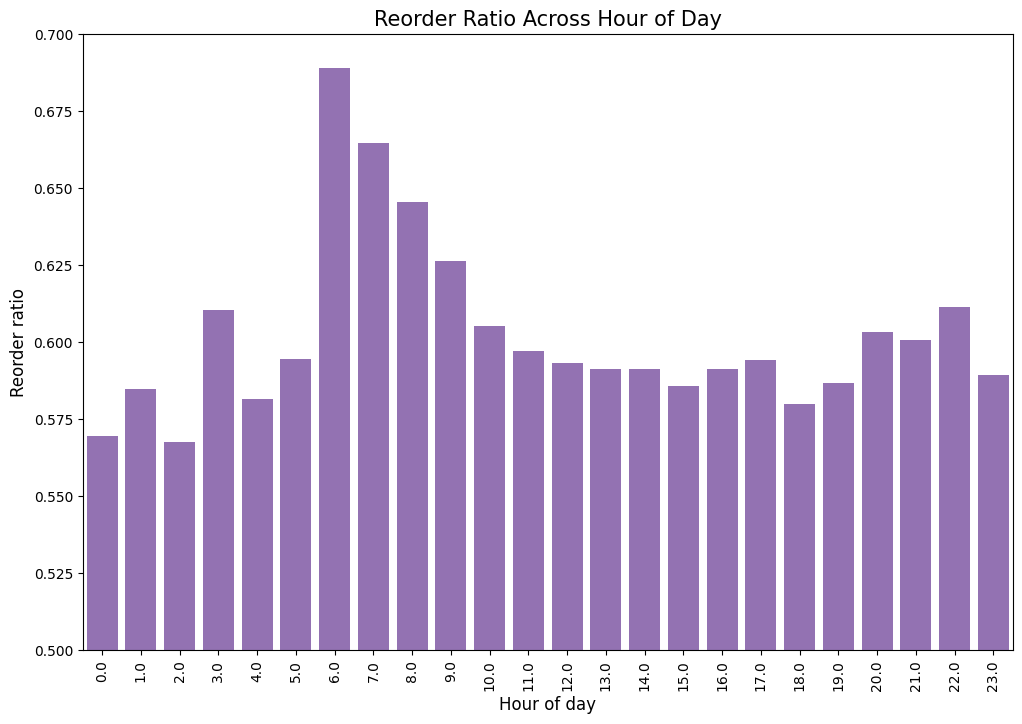

In [75]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='order_hour_of_day', y='reordered', data=grouped_df, color=color[4])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder Ratio Across Hour of Day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

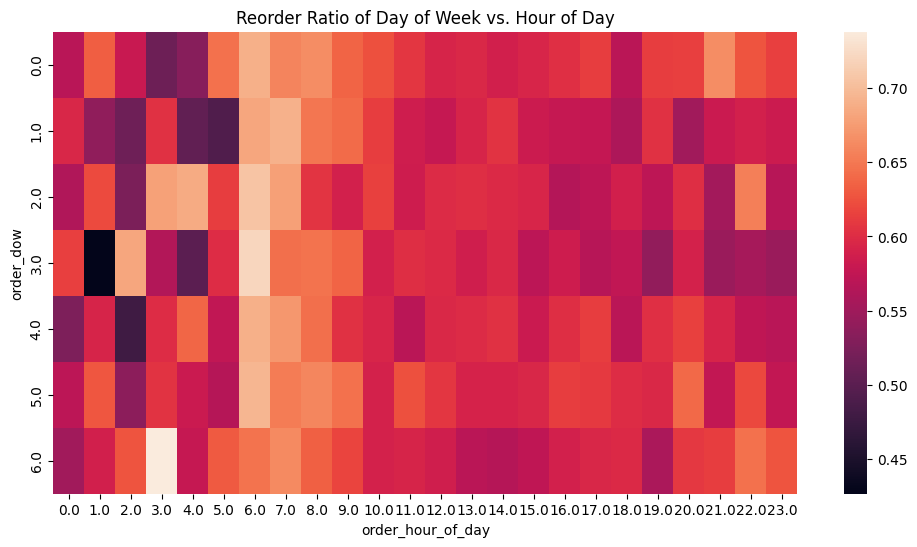

In [76]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_df)
plt.title("Reorder Ratio of Day of Week vs. Hour of Day")
plt.show()

# 새로운 시각화/전처리

**가장 많이 주문된 카테고리 시각화**

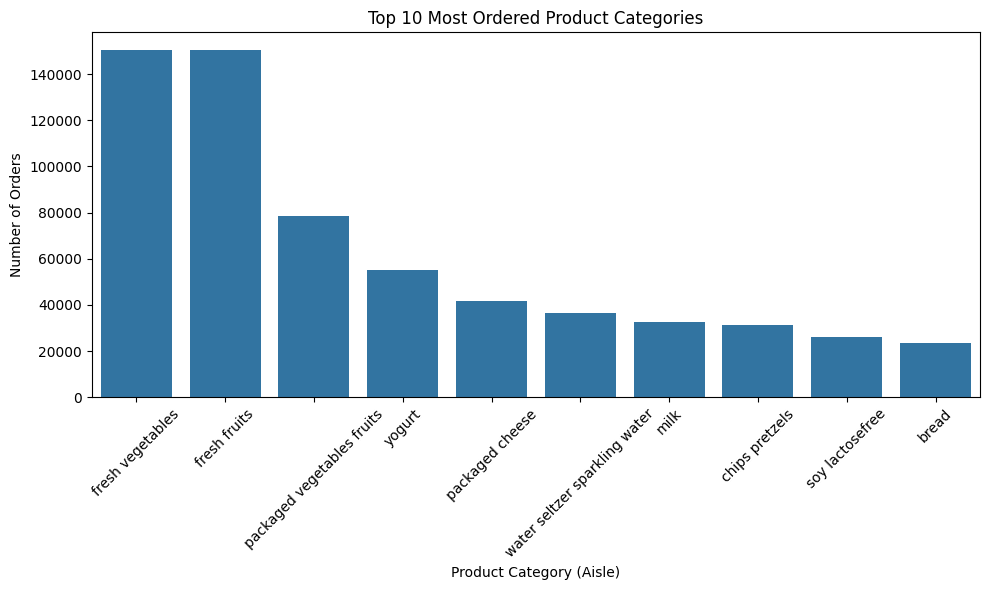

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 추출
order_products_train_df = pd.read_csv('/content/sample_data/order_products__train.csv')
products_df = pd.read_csv('/content/drive/MyDrive/products.csv')
aisles_df = pd.read_csv('/content/drive/MyDrive/aisles.csv')

# 데이터를 병합 및 빈도 계산
merged_df = pd.merge(order_products_train_df, products_df, on='product_id', how='inner')
merged_df = pd.merge(merged_df, aisles_df, on='aisle_id', how='inner')
aisle_counts_df = merged_df['aisle'].value_counts().head(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(y=aisle_counts_df.values, x=aisle_counts_df.index)
plt.title('Top 10 Most Ordered Product Categories')
plt.ylabel('Number of Orders')
plt.xlabel('Product Category (Aisle)')
plt.xticks(rotation=45)
plt.tight_layout()

# 결과 출력
plt.show()



- 가장 많이 주문된 상위 10개의 제품 카테고리를 나타냄.
- 각 막대는 특정 카테고리의 총 주문 횟수를 보여주며, 카테고리 이름은 가로축에, 주문 횟수는 세로축에 표시됨.
- 신선한 야채와 과일이 제일 많이 주문되었음을 알 수 있다.